In [1]:
import numpy as np
import pandas as pd
from functools import reduce
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import keras
from keras.preprocessing.image import load_img
from math import sin, cos
from PIL import ImageDraw, Image
import cv2
from cv2 import imread
import util
from util import *
import constants

Using TensorFlow backend.


In [2]:
train = pd.read_csv(constants.PATH + '/train.csv')
test = pd.read_csv(constants.PATH + 'sample_submission.csv')
# k is camera instrinsic matrix
# camera_matrix = np.array([[2304.5479, 0,  1686.2379],
#                           [0, 2305.8757, 1354.9849],
#                           [0, 0, 1]], dtype=np.float32)
train

,ImageId,PredictionString
0,ID_8a6e65317,16 0.254839 -2.57534 -3.10256 7.96539 3.20066 ...
1,ID_337ddc495,66 0.163988 0.192169 -3.12112 -3.17424 6.55331...
2,ID_a381bf4d0,43 0.162877 0.00519276 -3.02676 2.1876 3.53427...
3,ID_7c4a3e0aa,43 0.126957 -3.04442 -3.10883 -14.738 24.6389 ...
4,ID_8b510fad6,37 0.16017 0.00862796 -3.0887 -3.04548 3.4977 ...
...,...,...
4257,ID_de17ab626,70 0.177583 -0.023215 -3.08003 -25.3682 7.5732...
4258,ID_5a669e211,12 0.23817 -3.12745 3.13929 -7.21988 3.09626 1...
4259,ID_aa6ffba0a,35 0.166437 -0.497963 -3.12063 12.6792 5.48256...
4260,ID_29454123f,70 0.14292 0.0290822 -3.12594 -3.42749 3.38674...


In [11]:
# Select row in train data to examine
idx = 20
plt.rcParams["axes.grid"] = False
img_name = train.loc[idx]['ImageId']
pred_string = train.loc[idx]['PredictionString']

(2710, 3384, 3)


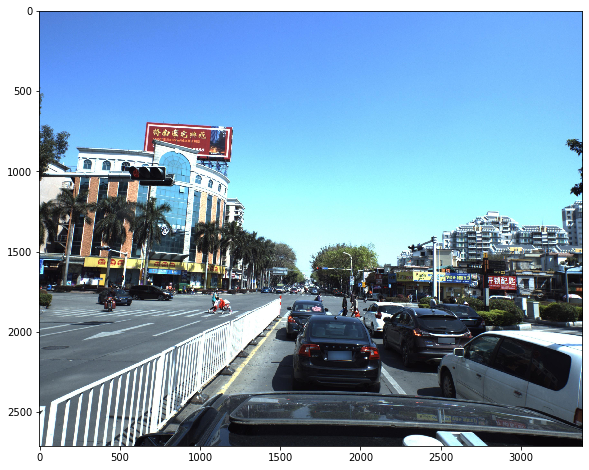

In [12]:
img = imread(constants.PATH + "train_images/" + img_name + '.jpg')
IMG_SHAPE = img.shape

plt.figure(figsize=(15,8))
plt.imshow(img);
print(IMG_SHAPE)

In [5]:
items = pred_string.split(' ')
model_types, yaws, pitches, rolls, xs, ys, zs = [items[i::7] for i in range(7)]

In [6]:
str2coords(pred_string)

[{'id': 35,
  'yaw': 0.155601,
  'pitch': -3.0666,
  'roll': -3.12739,
  'x': -9.96192,
  'y': 3.74923,
  'z': 16.1667},
 {'id': 35,
  'yaw': 0.168826,
  'pitch': -3.05687,
  'roll': -3.13329,
  'x': -9.71358,
  'y': 4.64836,
  'z': 22.2958},
 {'id': 71,
  'yaw': 0.14568,
  'pitch': 3.11718,
  'roll': 3.06917,
  'x': -11.3886,
  'y': 6.30126,
  'z': 31.5432},
 {'id': 16,
  'yaw': 0.174107,
  'pitch': -3.04766,
  'roll': -3.10726,
  'x': -9.50412,
  'y': 5.86577,
  'z': 31.2808},
 {'id': 46,
  'yaw': 0.160793,
  'pitch': -3.09256,
  'roll': 3.06199,
  'x': -11.5937,
  'y': 8.25406,
  'z': 45.7331},
 {'id': 8,
  'yaw': 0.249684,
  'pitch': 0.393478,
  'roll': -3.10994,
  'x': -9.59148,
  'y': 7.11822,
  'z': 41.7602},
 {'id': 18,
  'yaw': 0.164727,
  'pitch': 3.07823,
  'roll': -3.13975,
  'x': -12.8245,
  'y': 13.9858,
  'z': 81.1565},
 {'id': 14,
  'yaw': 0.134153,
  'pitch': 2.99846,
  'roll': 3.1158,
  'x': -9.7937,
  'y': 13.053,
  'z': 78.4193},
 {'id': 18,
  'yaw': 0.294526,
  'pi

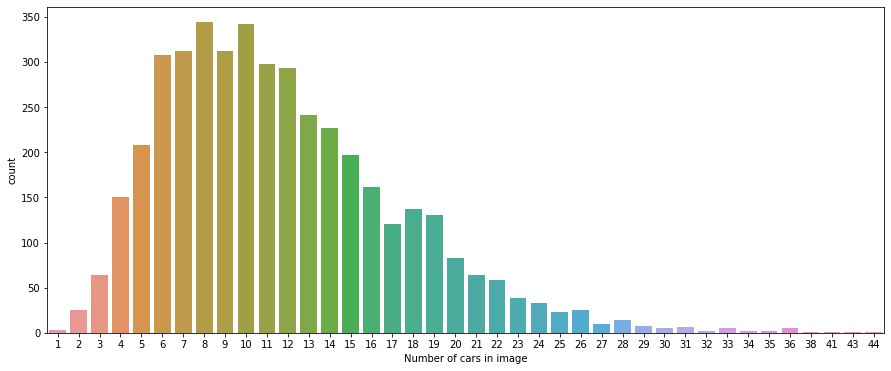

In [7]:
lens = [len(str2coords(s)) for s in train['PredictionString']]

plt.figure(figsize=(15,6))
sns.countplot(lens);
plt.xlabel('Number of cars in image');

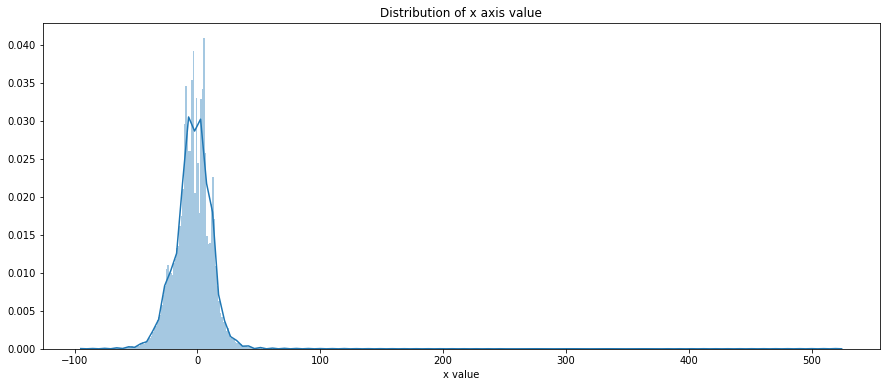

In [8]:
from functools import reduce
plt.figure(figsize=(15,6))
sns.distplot(reduce(lambda a, b: a + b, [[c['x'] for c in str2coords(s)] for s in train['PredictionString']]), bins=500);
# sns.distplot([str2coords(s)[0]['x'] for s in train['PredictionString']]);
plt.title("Distribution of x axis value")
plt.xlabel('x value')
plt.show()

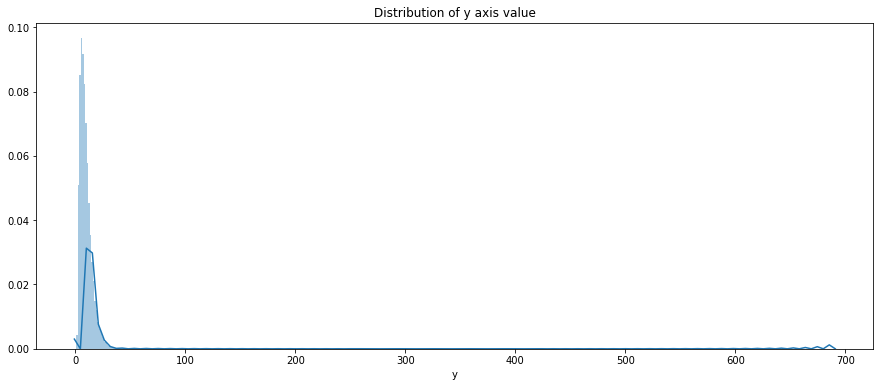

In [10]:
plt.figure(figsize=(15,6))
sns.distplot(reduce(lambda a, b: a + b, [[c['y'] for c in str2coords(s)] for s in train['PredictionString']]), bins=500);
plt.title("Distribution of y axis value")
plt.xlabel('y')
plt.show()

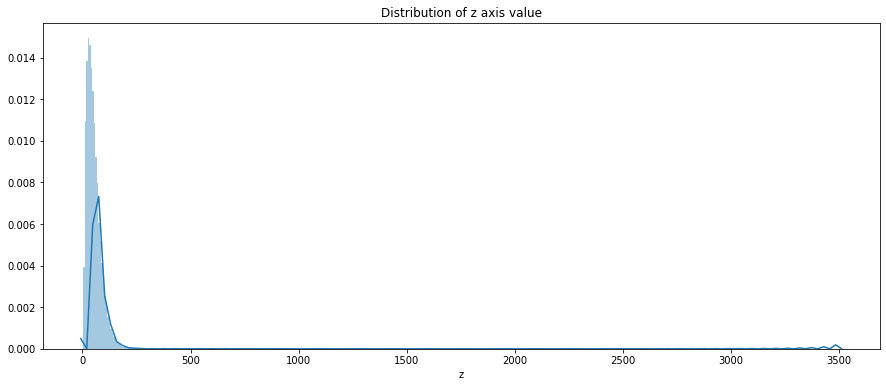

In [11]:
plt.figure(figsize=(15,6))
sns.distplot(reduce(lambda a, b: a + b, [[c['z'] for c in str2coords(s)] for s in train['PredictionString']]), bins=500);
plt.title("Distribution of z axis value")
plt.xlabel('z')
plt.show()

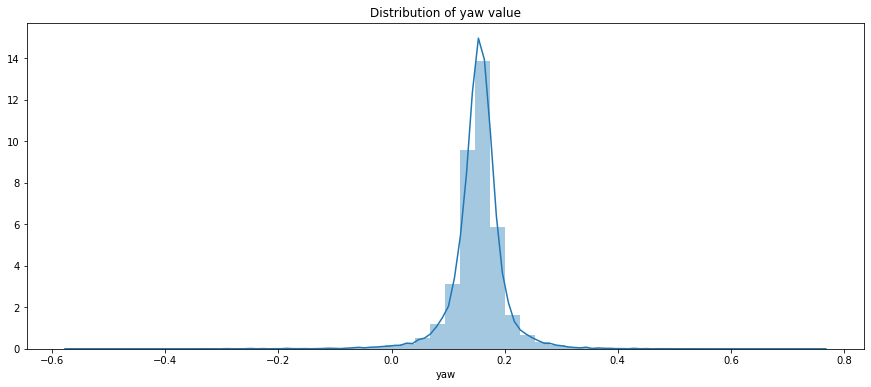

In [12]:
plt.figure(figsize=(15,6))
sns.distplot(reduce(lambda a, b: a + b, [[c['yaw'] for c in str2coords(s)] for s in train['PredictionString']]));
plt.title("Distribution of yaw value")
plt.xlabel('yaw')
plt.show()

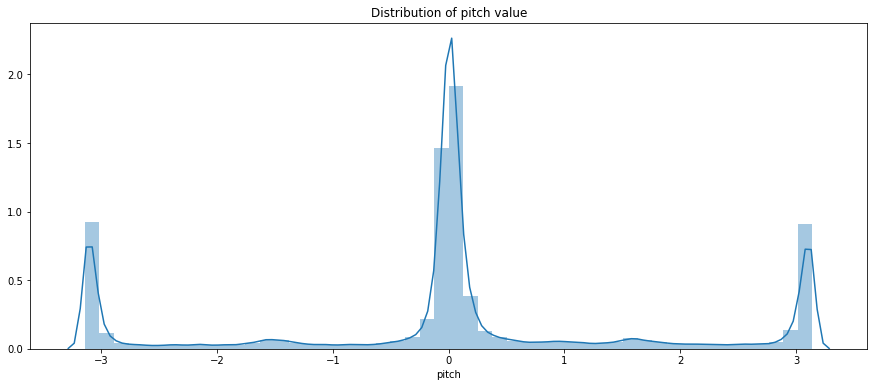

In [13]:
plt.figure(figsize=(15,6))
sns.distplot(reduce(lambda a, b: a + b, [[c['pitch'] for c in str2coords(s)] for s in train['PredictionString']]));
plt.title("Distribution of pitch value")
plt.xlabel('pitch')
plt.show()

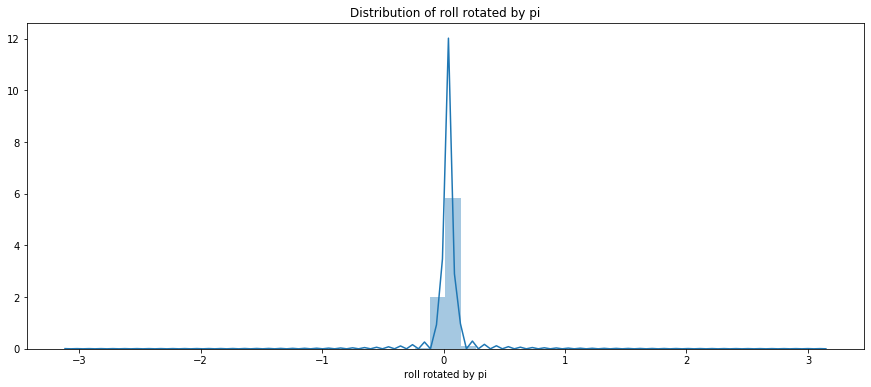

In [14]:

plt.figure(figsize=(15,6))
sns.distplot(reduce(lambda a, b: a + b, [[util.rotate(c['roll'], np.pi) for c in str2coords(s)] for s in train['PredictionString']]));
plt.title("Distribution of roll rotated by pi")
plt.xlabel('roll rotated by pi')
plt.show()

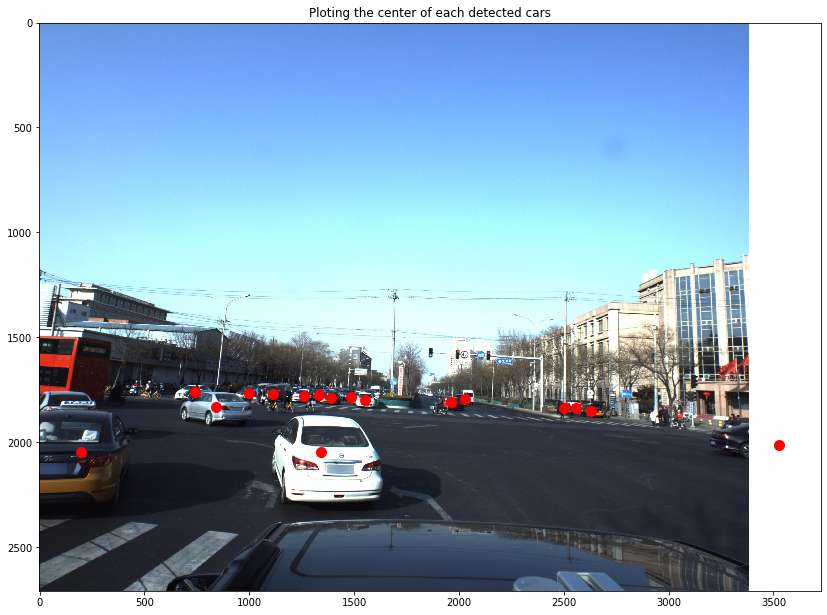

In [15]:
plt.figure(figsize=(14,14))
plt.title("Ploting the center of each detected cars")
plt.imshow(imread(constants.PATH + 'train_images/' + train['ImageId'][2217] + '.jpg'))
plt.scatter(*get_img_coords(train['PredictionString'][2217], constants.CAMERA_MATRIX), color='red', s=100);

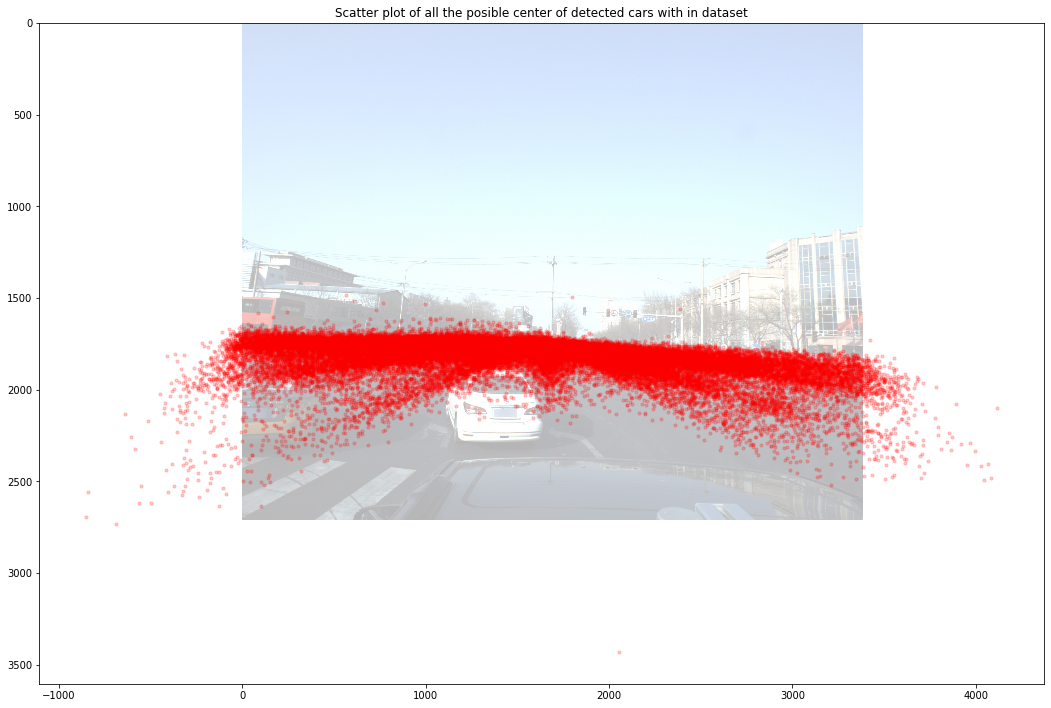

In [9]:
xs, ys = [], []

for ps in train['PredictionString']:
    x, y = get_img_coords(ps, constants.CAMERA_MATRIX)
    xs += list(x)
    ys += list(y)

plt.figure(figsize=(18,18))
plt.title("Scatter plot of all the posible center of detected cars with in dataset")
plt.imshow(imread(constants.PATH + 'train_images/' + train['ImageId'][2217] + '.jpg'), alpha=0.3)
plt.scatter(xs, ys, color='red', s=10, alpha=0.2);

Text(0.5, 1.0, 'Scatter plot of all posible centers from eagle view')

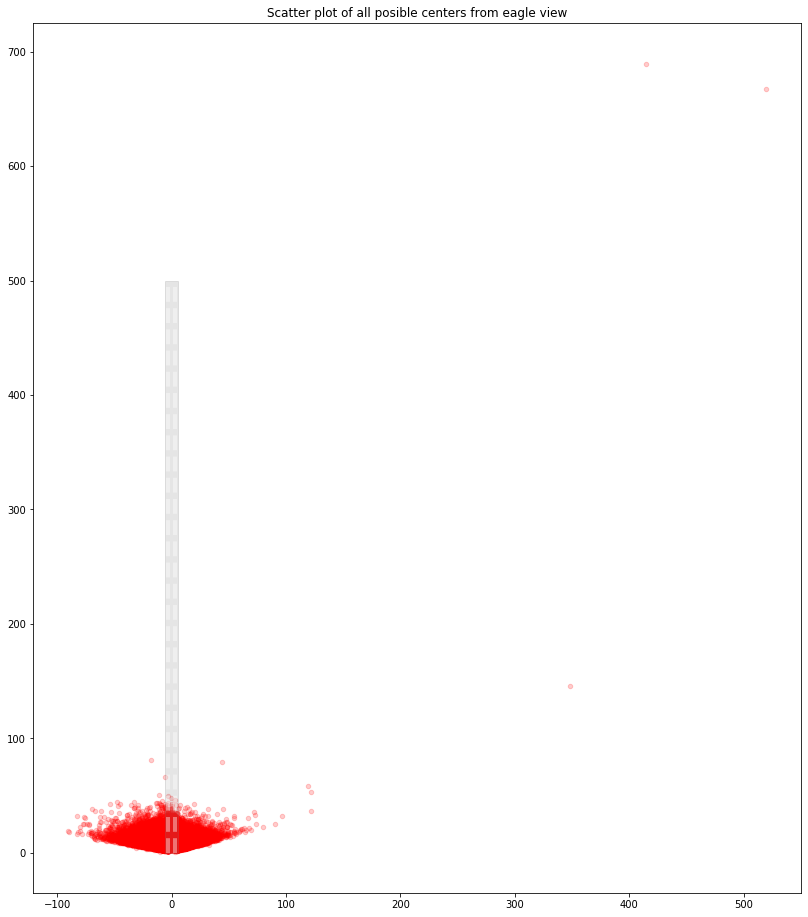

In [10]:
# Cars points
xs, ys = [], []
for ps in train['PredictionString']:
    coords = str2coords(ps)
    xs += [c['x'] for c in coords]
    ys += [c['y'] for c in coords]

# Road points
road_width = 6
road_xs = [-road_width, road_width, road_width, -road_width, -road_width]
road_ys = [0, 0, 500, 500, 0]

plt.figure(figsize=(16,16))
plt.axes().set_aspect(1)
# View road
plt.fill(road_xs, road_ys, alpha=0.2, color='gray')
plt.plot([road_width/2,road_width/2], [0,500], alpha=0.4, linewidth=4, color='white', ls='--')
plt.plot([-road_width/2,-road_width/2], [0,500], alpha=0.4, linewidth=4, color='white', ls='--')
# View cars
plt.scatter(xs, ys, color='red', s=20, alpha=0.2);
plt.title("Scatter plot of all posible centers from eagle view")

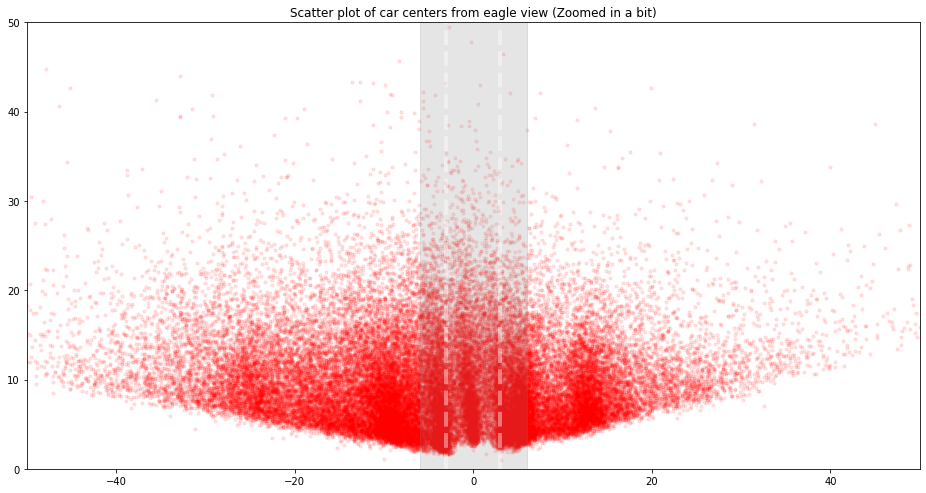

In [11]:
plt.figure(figsize=(16,16))
plt.axes().set_aspect(1)
plt.xlim(-50,50)
plt.ylim(0,50)

# View road
plt.fill(road_xs, road_ys, alpha=0.2, color='gray')
plt.plot([road_width/2,road_width/2], [0,100], alpha=0.4, linewidth=4, color='white', ls='--')
plt.plot([-road_width/2,-road_width/2], [0,100], alpha=0.4, linewidth=4, color='white', ls='--')
# View cars
plt.title("Scatter plot of car centers from eagle view (Zoomed in a bit)")
plt.scatter(xs, ys, color='red', s=10, alpha=0.1);

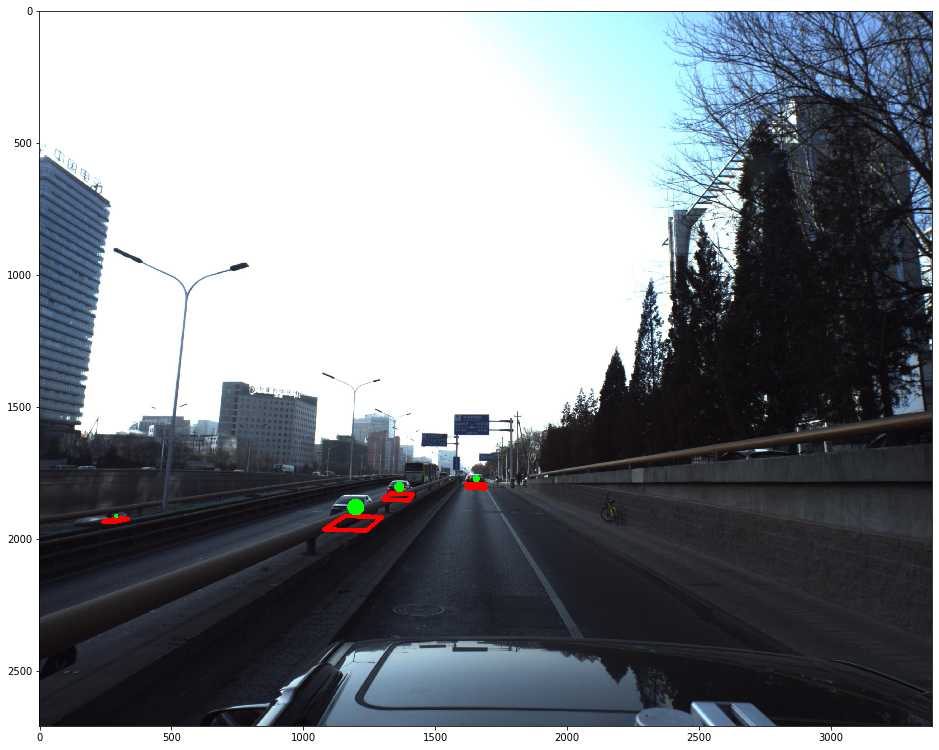

In [5]:
# def visualize(img, coords):
#     # You will also need functions from the previous cells
#     x_l = 1.02
#     y_l = 0.80
#     z_l = 2.31
    
#     img = img.copy()
#     for point in coords:
#         # Get values
#         x, y, z = point['x'], point['y'], point['z']
#         yaw, pitch, roll = -point['pitch'], -point['yaw'], -point['roll']
#         # Math
#         Rt = np.eye(4)
#         t = np.array([x, y, z])
#         Rt[:3, 3] = t
#         Rt[:3, :3] = euler_to_Rot(yaw, pitch, roll).T
#         Rt = Rt[:3, :]
#         P = np.array([[x_l, -y_l, -z_l, 1],
#                       [x_l, -y_l, z_l, 1],
#                       [-x_l, -y_l, z_l, 1],
#                       [-x_l, -y_l, -z_l, 1],
#                       [0, 0, 0, 1]]).T
#         img_cor_points = np.dot(constants.CAMERA_MATRIX, np.dot(Rt, P))
#         img_cor_points = img_cor_points.T
#         img_cor_points[:, 0] /= img_cor_points[:, 2]
#         img_cor_points[:, 1] /= img_cor_points[:, 2]
#         img_cor_points = img_cor_points.astype(int)
#         # Drawing
#         img = draw_line(img, img_cor_points)
#         img = draw_points(img, img_cor_points[-1:])
    
#     return img
row = 1000
img = imread(constants.PATH + 'train_images/' + train['ImageId'][row] + '.jpg')
coords = str2coords(train['PredictionString'][row])

plt.figure(figsize=(16, 16))
plt.imshow(visualize(img, coords))
plt.show()


In [8]:
def _regr_preprocess(regr_dict, flip=False):
    if flip:
        for k in ['x', 'pitch', 'roll']:
            regr_dict[k] = -regr_dict[k]
    for name in ['x', 'y', 'z']:
        regr_dict[name] = regr_dict[name] / 100
    regr_dict['roll'] = rotate(regr_dict['roll'], np.pi)
    regr_dict['pitch_sin'] = sin(regr_dict['pitch'])
    regr_dict['pitch_cos'] = cos(regr_dict['pitch'])
    regr_dict.pop('pitch')
    regr_dict.pop('id')
    return regr_dict

def _regr_back(regr_dict):
    for name in ['x', 'y', 'z']:
        regr_dict[name] = regr_dict[name] * 100
    regr_dict['roll'] = rotate(regr_dict['roll'], -np.pi)
    
    pitch_sin = regr_dict['pitch_sin'] / np.sqrt(regr_dict['pitch_sin']**2 + regr_dict['pitch_cos']**2)
    pitch_cos = regr_dict['pitch_cos'] / np.sqrt(regr_dict['pitch_sin']**2 + regr_dict['pitch_cos']**2)
    regr_dict['pitch'] = np.arccos(pitch_cos) * np.sign(pitch_sin)
    return regr_dict

def preprocess_image(img, flip=False):
    img = img[img.shape[0] // 2:]
    bg = np.ones_like(img) * img.mean(1, keepdims=True).astype(img.dtype)
    bg = bg[:, :img.shape[1] // 6]
    img = np.concatenate([bg, img, bg], 1)
    img = cv2.resize(img, (constants.IMG_WIDTH, constants.IMG_HEIGHT))
    if flip:
        img = img[:,::-1]
    return (img / 255).astype('float32')

def get_mask_and_regr(img, labels, flip=False):
    IMG_HEIGHT = constants.IMG_HEIGHT
    MODEL_SCALE = constants.MODEL_SCALE
    IMG_WIDTH = constants.IMG_WIDTH

    mask = np.zeros([IMG_HEIGHT // MODEL_SCALE, IMG_WIDTH // MODEL_SCALE], dtype='float32')
    regr_names = ['x', 'y', 'z', 'yaw', 'pitch', 'roll']
    regr = np.zeros([IMG_HEIGHT // MODEL_SCALE, IMG_WIDTH // MODEL_SCALE, 7], dtype='float32')
    coords = str2coords(labels)
    xs, ys = get_img_coords(labels, constants.CAMERA_MATRIX)
    for x, y, regr_dict in zip(xs, ys, coords):
        x, y = y, x
        x = (x - img.shape[0] // 2) * IMG_HEIGHT / (img.shape[0] // 2) / MODEL_SCALE
        x = np.round(x).astype('int')
        y = (y + img.shape[1] // 6) * IMG_WIDTH / (img.shape[1] * 4/3) / MODEL_SCALE
        y = np.round(y).astype('int')
        if x >= 0 and x < IMG_HEIGHT // MODEL_SCALE and y >= 0 and y < IMG_WIDTH // MODEL_SCALE:
            mask[x, y] = 1
            regr_dict = _regr_preprocess(regr_dict, flip)
            regr[x, y] = [regr_dict[n] for n in sorted(regr_dict)]
    if flip:
        mask = np.array(mask[:,::-1])
        regr = np.array(regr[:,::-1])
    return mask, regr

img.shape (480, 1536, 3) std: 0.29816076
mask.shape (60, 192) std: 0.020828811
regr.shape (60, 192, 7) std: 0.008807971


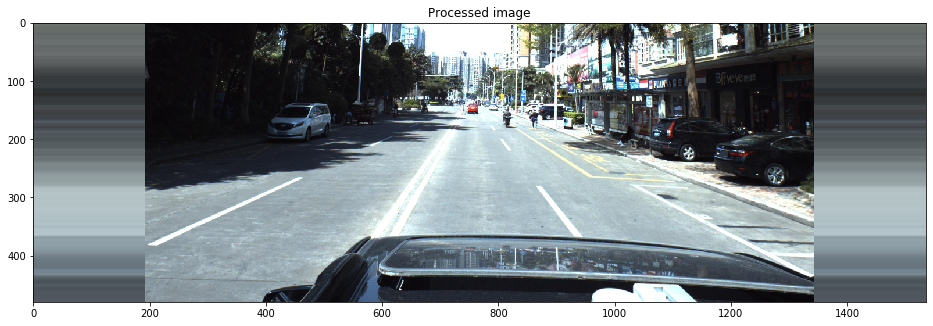

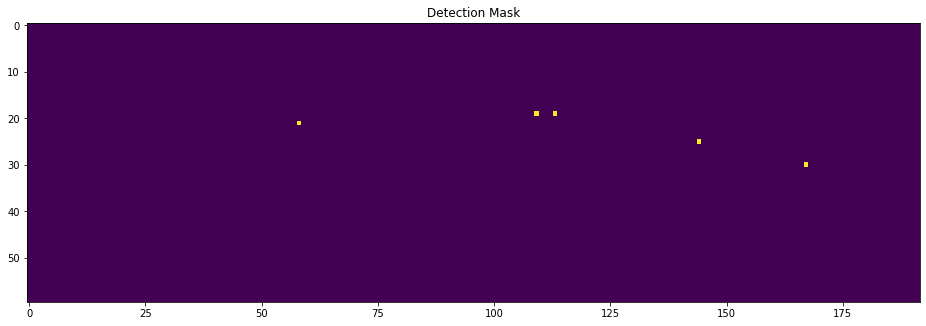

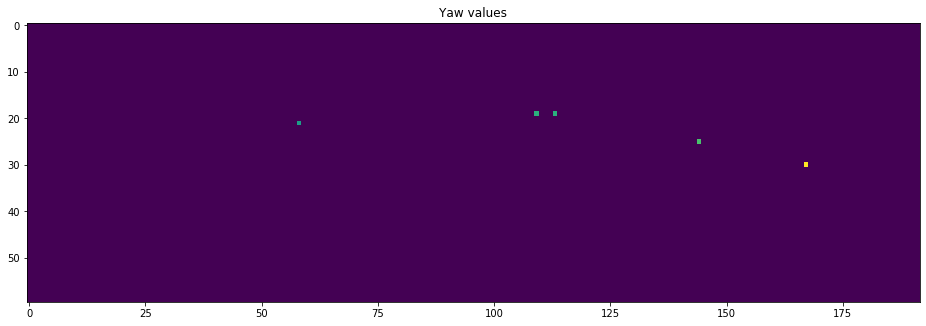

In [9]:
img0 = imread(constants.PATH + 'train_images/' + train['ImageId'][0] + '.jpg')
img = preprocess_image(img0)

mask, regr = get_mask_and_regr(img0, train['PredictionString'][0])

print('img.shape', img.shape, 'std:', np.std(img))
print('mask.shape', mask.shape, 'std:', np.std(mask))
print('regr.shape', regr.shape, 'std:', np.std(regr))

plt.figure(figsize=(16,16))
plt.title('Processed image')
plt.imshow(img)
plt.show()

plt.figure(figsize=(16,16))
plt.title('Detection Mask')
plt.imshow(mask)
plt.show()

plt.figure(figsize=(16,16))
plt.title('Yaw values')
plt.imshow(regr[:,:,-2])
plt.show()

In [ ]:
# !pip install efficientnet-pytorch --user
# !pip install torch --user